# [Santander Customer Transaction Prediction]([https://www.kaggle.com/c/santander-customer-transaction-prediction/data])

Can you identify who will make a transaction?

## Description

At [Santander](https://www.santanderbank.com/) our mission is to help people and businesses prosper. We are always looking for ways to help our customers understand their financial health and identify which products and services might help them achieve their monetary goals.

Our data science team is continually challenging our machine learning algorithms, working with the global data science community to make sure we can more accurately identify new ways to solve our most common challenge, binary classification problems such as: is a customer satisfied? Will a customer buy this product? Can a customer pay this loan?

In this challenge, we invite Kagglers to help us identify which customers will make a specific transaction in the future, irrespective of the amount of money transacted. The data provided for this competition has the same structure as the real data we have available to solve this problem.

## Evaluation

Submissions are evaluated on [area under the ROC curve](http://en.wikipedia.org/wiki/Receiver_operating_characteristic) between the predicted probability and the observed target.

**Submission File**

For each Id in the test set, you must make a binary prediction of the target variable. The file should contain a header and have the following format:

```bash
ID_code,target
test_0,0
test_1,1
test_2,0
etc.
```

## Prizes

- 1st Place: $ 25,000

- 2nd Place: $ 17,000

- 3rd Place: $ 10,000

- 4th Place: $ 8,000

- 5th Place: $ 5,000

## Setup

In [212]:
import sys

# install dependencies in the current Jupyter kernel
!{sys.executable} -m pip install kaggle seaborn eli5

## Data Understanding

You are provided with an anonymized dataset containing numeric feature variables, the binary `target` column, and a string `ID_code` column.

The task is to predict the value of `target` column in the test set.

**File descriptions:**

- `train.csv` - the training set.
- `test.csv` - the test set. The test set contains some rows which are not included in scoring.
- `sample_submission.csv` - a sample submission file in the correct format.

**Train contains:**

- `ID_code` (string);
- `target`;
- 200 _numerical_ variables, named from `var_0` to `var_199` (float64);

**Test contains:**

- `ID_code` (string);
- 200 _numerical_ variables, named from `var_0` to `var_199` (float64);

## Data Aquisition

Use [Kaggle API](https://github.com/Kaggle/kaggle-api) to retrieve data.

_**Obs.:**_ you only need to run the cells from this section once.

In [46]:
%env KAGGLE_USERNAME=cbmelo97
%env KAGGLE_KEY=8356ae667e7d3e0d0244776653e1fc69

env: KAGGLE_USERNAME=cbmelo97
env: KAGGLE_KEY=8356ae667e7d3e0d0244776653e1fc69


In [15]:
!kaggle competitions download -c santander-customer-transaction-prediction -p data

 99%|███████████████████████████████████████▋| 248M/250M [00:14<00:00, 20.7MB/s]
100%|████████████████████████████████████████| 250M/250M [00:14<00:00, 17.7MB/s]


## Data Exploration

In [225]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [226]:
pd.set_option('display.max_rows', 202)
pd.set_option('display.max_columns', 202)
pd.set_option('display.width', 202)

In [227]:
df_train = pd.read_csv("data/santander-customer-transaction-prediction/train.csv")

In [228]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [229]:
df_train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [230]:
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

**Are there any null values in the `train` dataset?**

In [231]:
#Check for Missing Values after Concatination

null_count = df_train.isnull().sum().sort_values(ascending=False)
percentage = round(((null_count / len(df_train)) * 100), 2)

pd.concat([null_count, percentage],
          axis=1,
          keys= ['Null Count', '%'])

,Null Count,%
var_199,0,0.0
var_61,0,0.0
var_71,0,0.0
var_70,0,0.0
var_69,0,0.0
var_68,0,0.0
var_67,0,0.0
var_66,0,0.0
var_65,0,0.0
var_64,0,0.0


**What is the label distribution for the `train` dataset?**

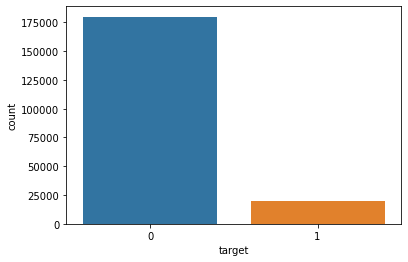

In [232]:
sns.countplot(df_train['target'])

**Whate are the highest and lowest correlations with labels?**

In [233]:
def get_corr(dataframe, columns):
    correlations = dataframe[columns].corr()
    correlations_sorted = correlations.abs().unstack().sort_values(kind="quicksort").reset_index()
    correlations_with_no_identicals = correlations_sorted[correlations_sorted['level_0'] != correlations_sorted['level_1']]
    return correlations_with_no_identicals

In [234]:
columns = [column for column in df_train.columns if (column not in ['ID_code'])]

In [235]:
correlations = get_corr(df_train, columns)

In [236]:
correlations_with_labels = correlations.loc[(correlations['level_0'] == 'target') | (correlations['level_1'] == 'target')].reset_index()
correlations_with_labels

,index,level_0,level_1,0
0,682,var_185,target,0.000053
1,683,target,var_185,0.000053
2,7354,target,var_27,0.000582
3,7355,var_27,target,0.000582
4,8090,target,var_30,0.000638
...,...,...,...,...
395,40195,target,var_12,0.069489
396,40196,target,var_139,0.074080
397,40197,var_139,target,0.074080
398,40198,target,var_81,0.080917


In [237]:
# highest correlated features

correlations_with_labels.tail(80)

,index,level_0,level_1,0
320,40120,target,var_108,0.044791
321,40121,var_108,target,0.044791
322,40122,target,var_154,0.046106
323,40123,var_154,target,0.046106
324,40124,target,var_92,0.046295
325,40125,var_92,target,0.046295
326,40126,var_94,target,0.046296
327,40127,target,var_94,0.046296
328,40128,var_191,target,0.047114
329,40129,target,var_191,0.047114


In [238]:
# lowest correlated features

correlations_with_labels.head(80)

,index,level_0,level_1,0
0,682,var_185,target,0.000053
1,683,target,var_185,0.000053
2,7354,target,var_27,0.000582
3,7355,var_27,target,0.000582
4,8090,target,var_30,0.000638
5,8091,var_30,target,0.000638
6,10926,target,var_17,0.000864
7,10927,var_17,target,0.000864
8,12210,var_38,target,0.000970
9,12211,target,var_38,0.000970


**Whate are the highest and lowest correlations amongst features?**

In [239]:
features = [column for column in df_train.columns if (column not in ['ID_code', 'target'])]

In [240]:
feature_correlations = get_corr(df_train, features)

In [241]:
feature_correlations

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
...,...,...,...
39795,var_165,var_81,9.713658e-03
39796,var_53,var_148,9.787532e-03
39797,var_148,var_53,9.787532e-03
39798,var_26,var_139,9.844361e-03


In [242]:
# highest correlated features

feature_correlations.tail(80)

,level_0,level_1,0
39720,var_113,var_103,0.007760
39721,var_103,var_113,0.007760
39722,var_188,var_34,0.007765
39723,var_34,var_188,0.007765
39724,var_155,var_18,0.007791
39725,var_18,var_155,0.007791
39726,var_93,var_13,0.007796
39727,var_13,var_93,0.007796
39728,var_191,var_166,0.007798
39729,var_166,var_191,0.007798


In [243]:
# lowest correlated features

feature_correlations.head(80)

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


**How do the columns relationship behave?**

In [244]:
# sns.pairplot(df_train,
#              vars=columns,
#              hue='target')

**What are the `max`, `min`, `std` and `mean` values for each `column` and `row`?**

In [254]:
def plotter(dataframe, label, axis, statistic, colors):  
    plt.figure(figsize=(15,5))
    plt.title(f"Distribution of {statistic.__name__.upper()} values per {axis.upper()} in the train set.")
    
    for label_value in dataframe[label].unique():
        df = dataframe.loc[(dataframe[label] == label_value)]
        axis_value = 0 if axis == 'column' else 1

        value = getattr(df, statistic.__name__)(axis=axis_value)
        sns.distplot(value, color=colors.pop(), kde=True, bins=120, label=f'label: {label_value}')
    
    plt.legend() 
    plt.show()

In [315]:
axes       = ['column', 'row']
statistics = [pd.DataFrame.min,
              pd.DataFrame.max,
              pd.DataFrame.mean,
              pd.DataFrame.std,
              pd.DataFrame.median,
              pd.DataFrame.sum,
              pd.DataFrame.skew,
              pd.DataFrame.kurtosis]

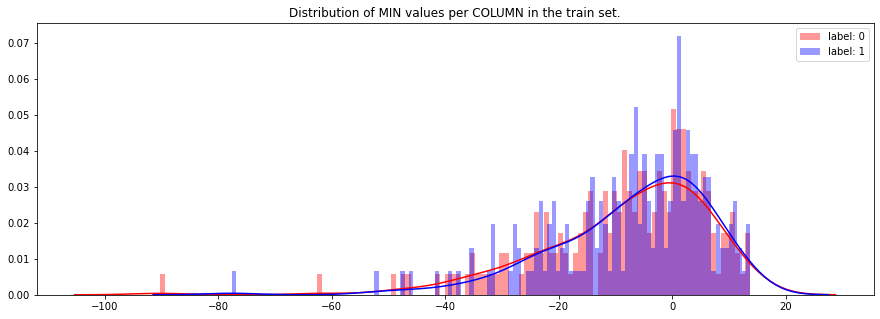

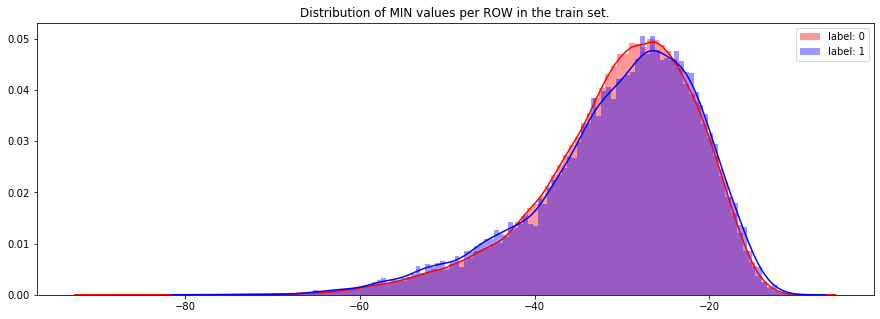

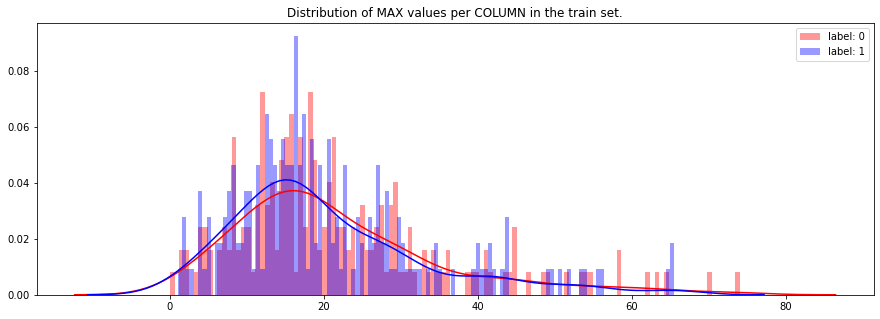

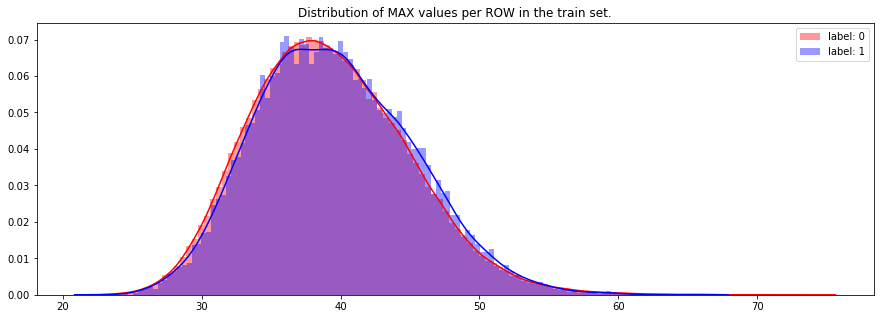

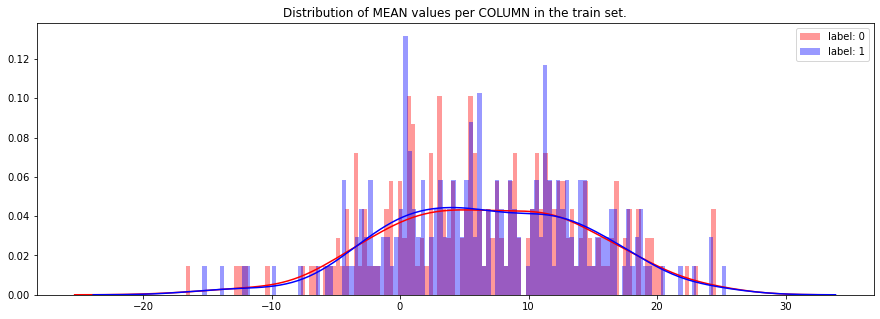

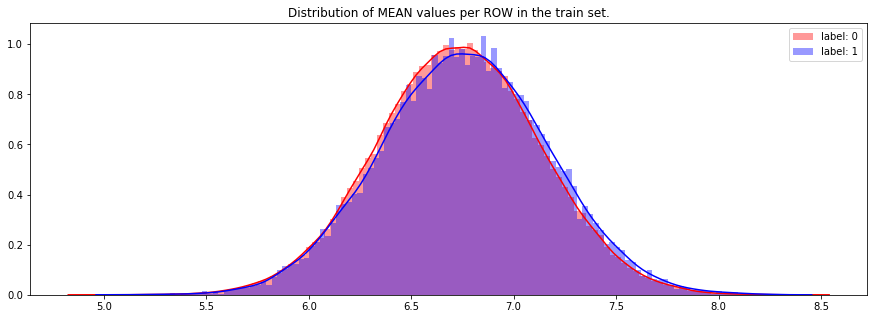

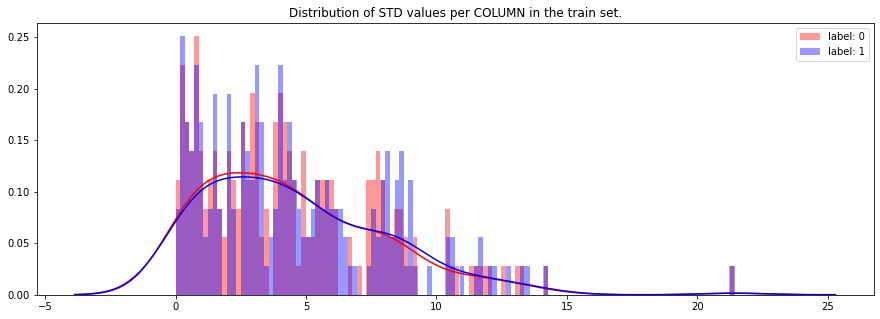

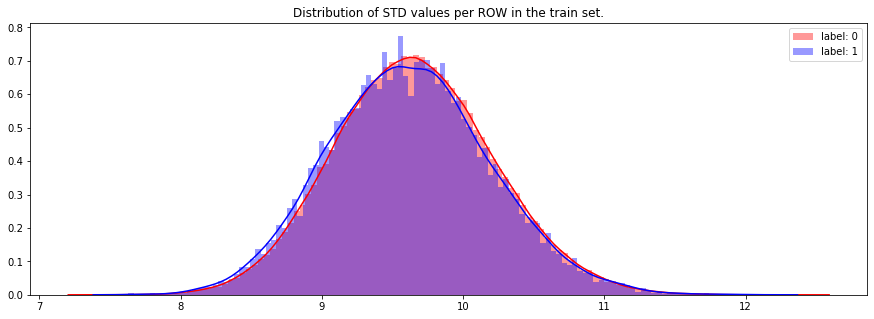

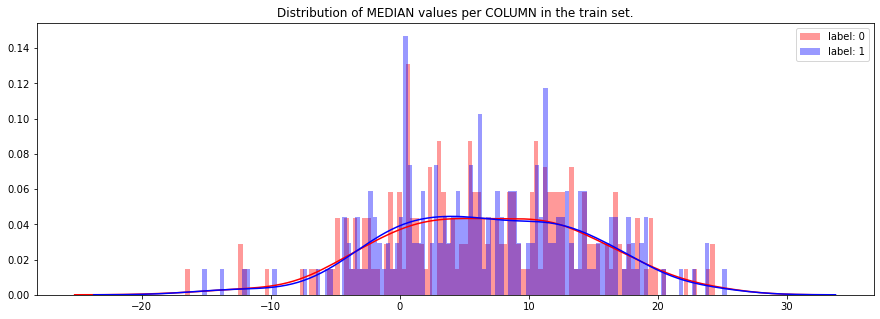

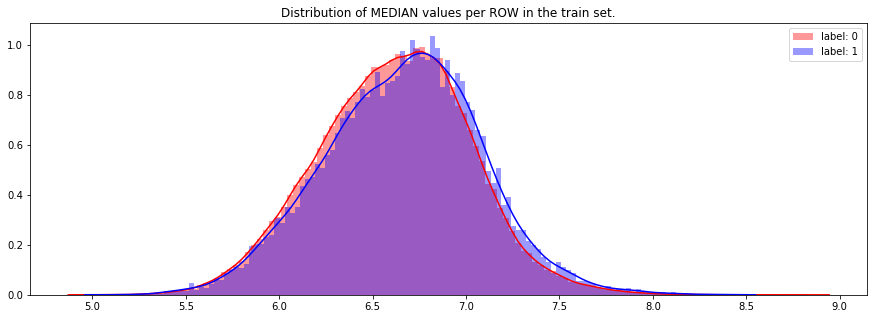

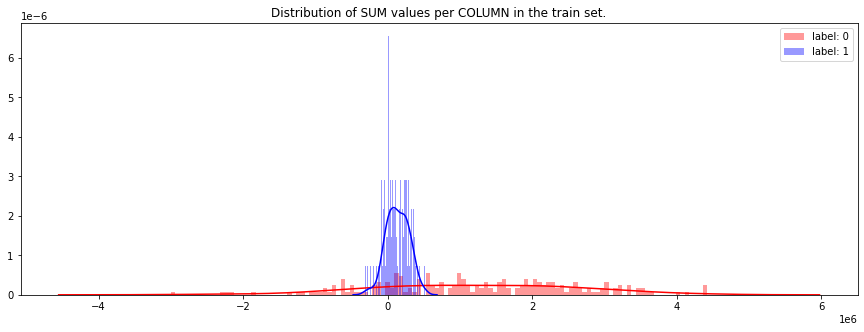

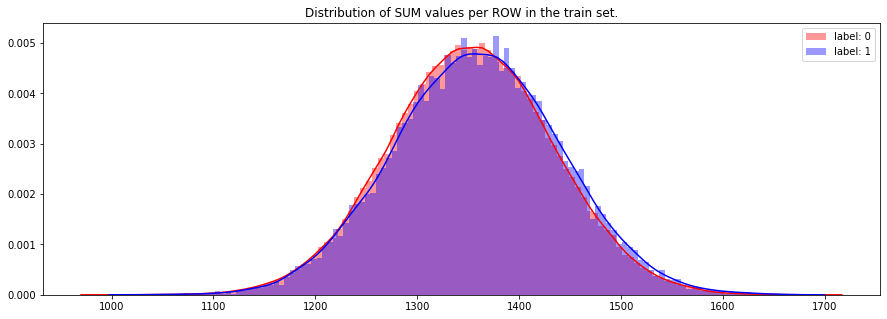

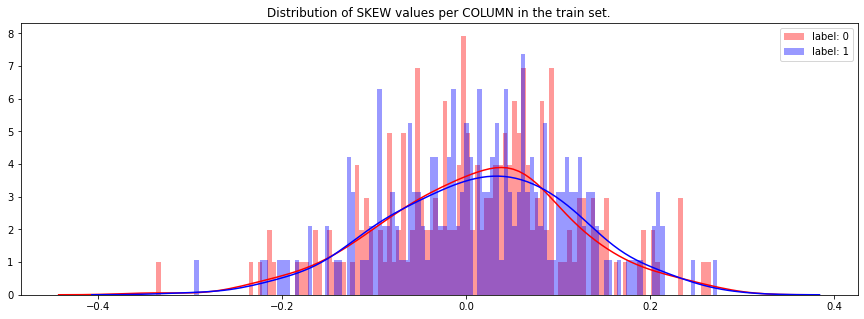

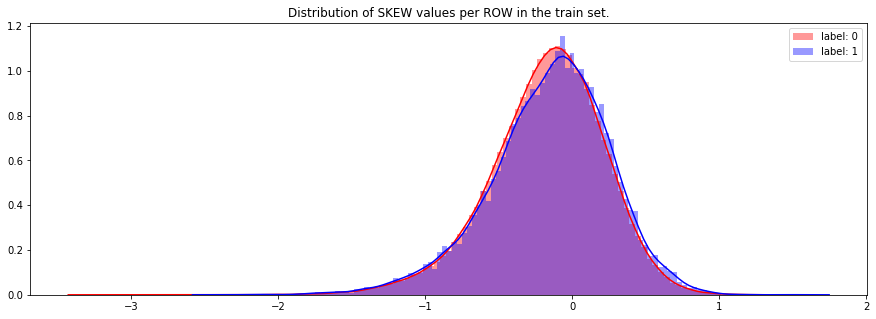

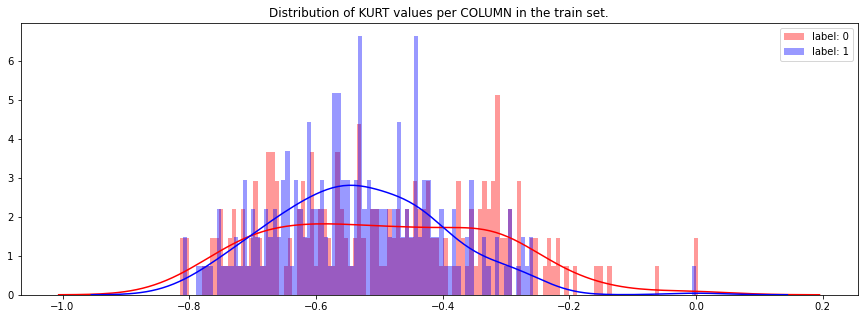

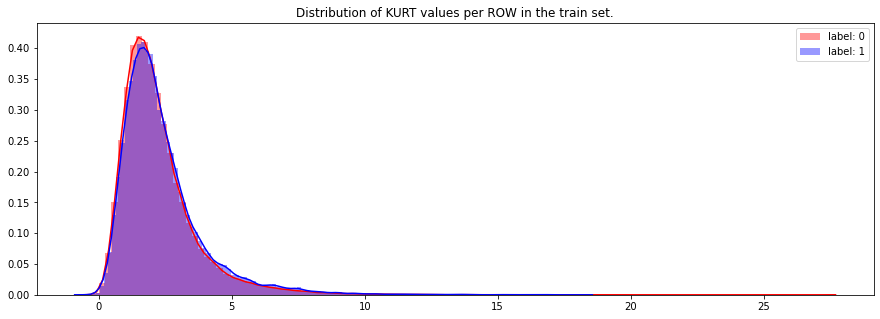

In [316]:
for statistic in statistics:
    for axis in axes:
        plotter(df_train[columns], 'target', axis, statistic, ['blue', 'red'])

## Database Splitting

In [257]:
from sklearn.model_selection import train_test_split

y = df_train['target']
X = df_train.drop(['target', 'ID_code'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=42,
                                                    shuffle=True)

## Data Handling

**Can we apply feature engineering?**

Feature engineering for this data set is pretty complex: we have 200k observations and 200 anonymized features. Ideally, we'd do a Principal Component Analysis as well as attempt to explain a feature importance (with `eli5`, for example). From there, perform an in depth study of the results. However, due to the deadline of this assignment and the training time for our model, the team decided to use some of the statistics we visualized in the data exploration section and use them as features - its quite simple and might be of value to us ^_^

_Huge thanks to [@gpreda](https://www.kaggle.com/gpreda/santander-eda-and-prediction) for the awesome notebook, we got a lot of insights from it!_

In [286]:
def feature_engineering(dataframe, statistics):
    df = dataframe.copy()
    for statistic in statistics:
        result = getattr(df, statistic.__name__)(axis=1)
        df[statistic.__name__] = result
    
    return df

In [288]:
feature_engineering_statistics = [pd.DataFrame.min,
                                  pd.DataFrame.max,
                                  pd.DataFrame.mean,
                                  pd.DataFrame.std,
                                  pd.DataFrame.median,
                                  pd.DataFrame.sum,
                                  pd.DataFrame.skew,
                                  pd.DataFrame.kurtosis]

In [289]:
X_train_augmented = feature_engineering(X_train, feature_engineering_statistics)
X_train_augmented.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,...,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,min,max,mean,std,median,sum,skew,kurt
21269,8.7097,2.3279,9.3181,6.4435,12.9493,-14.8110,6.4434,21.9997,3.3241,8.7876,-4.3702,-10.0087,13.8158,13.6235,10.9536,14.0476,15.9814,-3.3593,5.6764,3.4602,19.4700,21.8917,5.3436,2.2675,7.4390,13.7334,-3.7417,-2.1569,4.6568,6.0720,3.1057,12.0107,0.8300,9.8552,10.9708,5.5812,4.7808,9.3711,13.5498,6.8526,-1.7219,20.0797,10.7218,11.4170,13.4761,-0.3020,9.0269,-5.2995,2.2269,11.4499,13.5442,16.8353,1.7584,5.4738,-3.3550,14.1981,18.0582,7.6593,7.0077,8.2038,11.4967,-13.8644,-1.1455,1.5208,8.2436,1.9585,7.8476,19.2454,5.0224,2.9313,25.9602,0.3726,-1.6581,12.4263,-0.0225,17.6928,5.2202,14.0976,4.5744,15.1668,-0.0357,13.2534,-11.5911,4.4037,9.9865,16.3307,-1.9182,11.2390,13.4777,9.9478,1.5067,6.9109,10.9163,10.8817,14.7406,0.6614,21.5943,31.7966,2.3299,-3.3776,-12.5551,...,21.4781,14.0481,12.9712,6.2812,6.8090,3.2953,10.1416,4.0926,8.5118,0.2719,15.0369,0.2343,2.5730,6.4499,11.6101,1.2406,1.7572,5.1865,12.0443,11.5355,5.6427,-1.8511,11.4397,12.0974,-0.1922,7.6427,7.2391,-5.0762,9.0408,35.9692,0.7310,-5.8916,15.1404,-0.9738,-2.8300,15.3581,9.2179,7.9819,11.5717,8.8301,-0.8657,4.1134,5.5309,13.1862,7.2798,8.3978,16.9213,14.1213,-10.6347,12.1368,4.6713,18.8169,14.4591,6.6502,5.7769,6.8210,15.5202,-0.4023,20.4130,2.4135,-0.2701,4.0861,5.3393,6.0899,-4.2220,25.5313,-6.6739,13.5861,7.8924,-9.8098,11.8565,-3.9837,0.5584,1.2490,7.8869,12.0197,13.5781,7.5581,-0.2066,5.7302,-15.4358,18.2458,2.3202,2.2250,7.0588,-0.0444,4.4508,12.6102,-0.2699,-2.9296,9.5868,16.8442,-9.2034,-15.4358,35.9692,6.954623,8.550985,6.981162,1427.320670,14.194267,203.932354
187660,4.2912,-2.7690,8.4305,9.4977,10.3713,-18.2966,5.5147,14.5811,-1.8072,6.3641,2.6445,8.9217,14.1001,5.2588,6.1350,15.0281,12.2080,-0.5688,12.0047,11.1774,8.5228,31.2219,2.4062,3.5376,6.0522,13.1485,-7.8524,-3.0217,5.7007,8.3345,-22.8044,11.6693,-3.8629,13.8747,11.0367,10.1327,4.0774,6.0343,19.0936,-6.4881,-13.5227,14.7626,10.8150,11.9780,8.1652,-30.7436,13.2353,-6.8473,-2.3198,16.6032,13.8781,19.8199,-7.4309,6.4740,6.8204,5.0206,20.2331,5.6832,-0.7412,9.0310,12.4972,-33.2906,-1.0955,6.0980,5.3152,-2.7559,6.4114,5.9114,5.0146,-7.7616,31.6240,0.4930,1.9379,7.8910,2.9958,13.6644,13.3508,23.6808,8.9037,15.2045,0.3602,10.2295,-6.2103,-1.3268,-7.7146,19.6657,-2.5640,21.5327,5.2014,4.5407,-19.6963,6.8949,7.9891,10.6633,11.6720,0.3074,17.6247,13.7723,0.1415,-2.1327,-17.5035,...,30.5984,14.4666,18.7999,1.1433,6.7386,4.0620,13.1466,2.7195,0.3221,2.7345,35.3942,-9.9050,5.9958,5.1811,10.9798,-5.8797,-1.5709,6.4113,12.0322,13.0893,4.1430,3.7010,16.82

In [296]:
X_test_augmented = feature_engineering(X_test, feature_engineering_statistics)
X_test_augmented.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,...,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,min,max,mean,std,median,sum,skew,kurt
119737,11.0038,-4.5026,9.0662,6.4313,10.7061,-15.2857,5.1233,16.7875,4.1833,8.4055,-4.1540,-10.8329,14.2550,3.1023,8.3950,14.6973,9.3601,-16.2458,25.2103,5.2981,25.7090,26.2138,3.1250,3.8624,9.8719,13.3379,-0.2924,-2.8902,6.6151,2.6974,-12.9289,10.3559,-4.5293,14.8238,10.7379,-5.9351,-2.7626,3.3004,18.0687,-3.7963,1.5211,0.9202,10.7751,11.7170,5.0610,1.2944,9.4658,-9.5221,5.7952,14.5765,13.1835,15.6327,-5.2194,6.0951,18.4414,9.3247,14.5002,6.6383,12.7107,9.1876,8.8871,-17.0163,-4.3664,3.7512,8.0373,0.1397,5.1969,17.5726,5.0097,0.4313,15.9658,1.0141,5.7492,26.1362,46.5982,24.0125,13.1818,24.3687,7.4199,13.0182,8.7930,12.5658,-13.9001,15.4529,-7.2884,20.2432,-3.0771,10.5996,9.8989,3.4473,-10.2275,6.8765,13.1948,10.3968,8.6256,1.0242,22.1407,20.4547,1.0939,-1.6103,-17.2279,...,8.5071,13.9550,21.1619,9.8180,5.0171,1.0761,15.7979,3.2167,5.1981,1.9220,14.5107,-1.2366,-0.1271,11.6247,13.0097,6.8252,-2.2583,4.4787,12.3314,12.6148,3.3645,-2.3593,18.3885,13.9670,0.6354,9.3048,6.6499,-2.8566,-8.6837,38.4343,9.9721,-0.2684,14.5387,1.6621,13.3718,5.5494,12.9814,8.9330,-3.7927,10.4264,-2.6617,4.3480,1.3219,15.7841,10.0351,7.0457,18.8337,13.1973,-4.3080,12.4991,3.8944,42.3906,5.4125,39.8310,5.8701,6.4919,10.2185,2.0958,21.2336,3.0491,-2.9704,3.1441,6.2050,0.4583,0.0768,15.5984,-4.9126,25.2907,8.1378,-8.2284,8.8929,-4.6192,0.8818,-9.0733,10.0524,8.8823,7.9633,2.9247,-1.8443,4.4832,-23.8737,11.0638,-0.5127,-0.8200,3.3085,3.1358,5.0959,19.7160,-0.1801,5.8437,8.8348,17.0461,8.8190,-23.8737,46.5982,7.021396,10.719735,6.737550,1442.800581,14.110597,202.314214
72272,12.8473,-6.1848,6.8799,2.0164,12.7998,10.2781,4.4191,15.6940,-0.6788,8.9070,-7.8677,4.3768,13.9440,8.0701,8.7038,14.3273,11.9843,-18.4636,28.0855,10.8519,15.4678,38.9225,1.0837,3.9982,9.2248,13.8777,-6.0565,-3.6397,7.0398,-0.1248,-6.5387,10.3549,-3.2378,12.4834,12.5291,2.7469,1.1170,7.3866,14.2286,-4.6728,-4.8113,11.3960,11.1624,11.3417,11.4641,-33.3715,8.2482,-34.4429,9.3439,3.2000,11.4987,2.9699,-7.3524,7.6389,-2.9723,19.6686,13.0295,7.5853,2.8926,9.1520,13.8062,-13.4844,2.5995,5.5608,5.2267,2.6055,6.6968,16.8178,5.0237,-6.8288,16.0420,0.9583,-2.3364,17.7823,28.7272,13.7785,13.2978,20.5482,6.1629,12.4820,10.6811,10.7930,4.8666,-0.5840,-10.2074,26.2577,-2.5012,7.1703,9.3130,7.5214,-32.7268,6.9069,4.9383,11.2197,9.4020,0.0977,21.0136,-6.3780,2.6695,1.0559,-28.2091,...,27.7338,14.2861,12.1129,3.5380,5.6703,2.7019,4.6279,2.4539,5.4431,0.9963,37.2631,-2.2788,8.5785,41.1329,12.2097,-11.0140,13.0264,6.6049,12.4909,12.7370,-0.4456,-7.33

In [284]:
# UNUSED

# import eli5
# from eli5.sklearn import PermutationImportance
# from sklearn.neural_network import MLPClassifier

# tmp_model = MLPClassifier(random_state=42,
#                           hidden_layer_sizes=(100, 50, 25),
#                           activation='relu',
#                           solver='adam',
#                           batch_size=16,
#                           learning_rate='constant',
#                           max_iter=400,
#                           shuffle=True,
#                           warm_start=False,
#                           early_stopping=True,
#                           validation_fraction=0.3,
#                           n_iter_no_change=10)

# tmp_model.fit(X_train, y_train)

# pi = PermutationImportance(tmp_model, random_state=42)
# pi.fit(X_test, y_test)

In [264]:
# eli5.show_weights(pi, feature_names=features, top=200)

Weight,Feature
0.0017 ± 0.0003,var_139
0.0014 ± 0.0005,var_21
0.0014 ± 0.0006,var_81
0.0013 ± 0.0004,var_179
0.0013 ± 0.0002,var_26
0.0013 ± 0.0003,var_80
0.0012 ± 0.0007,var_146
0.0011 ± 0.0001,var_99
0.0011 ± 0.0004,var_190
0.0010 ± 0.0005,var_44


## Model Application

- [ScikitLearn: MLP Module Explanation](https://scikit-learn.org/stable/modules/neural_networks_supervised.html#multi-layer-perceptron)
- [ScikitLearn: MLP Module Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
- [Machine Learning Mastery: How to Configure the Number of Layers and Nodes in a Neural Network](https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/)

In [290]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier

**Cross-validator creation**

In [291]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

**Pipeline creation**

In [292]:
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('MLP', MLPClassifier(verbose=True, random_state=42))])

**Hyperparameter tuning**

In [293]:
hyperparameters = {'MLP__hidden_layer_sizes': [(100, 50, 25)],
                   'MLP__activation': ['relu'],
                   'MLP__solver': ['adam'],
                   'MLP__batch_size': [16],
                   'MLP__learning_rate': ['constant'],
                   'MLP__max_iter': [400],
                   'MLP__shuffle': [True],
                   'MLP__warm_start': [False],
                   'MLP__early_stopping': [True],
                   'MLP__validation_fraction': [0.3],
                   'MLP__n_iter_no_change': [10]}

**Grid Search creation**

In [294]:
gscv = GridSearchCV(pipeline,
                    param_grid=hyperparameters,
                    cv=skf,
                    scoring='roc_auc',
                    verbose=True,
                    n_jobs=-3)

**Grid search application**

In [295]:
result = gscv.fit(X_train_augmented, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=-3)]: Using backend LokyBackend with 22 concurrent workers.
[Parallel(n_jobs=-3)]: Done  10 out of  10 | elapsed:   48.8s finished


Iteration 1, loss = 0.24809997
Validation score: 0.912357
Iteration 2, loss = 0.22904883
Validation score: 0.912381
Iteration 3, loss = 0.21905983
Validation score: 0.912310
Iteration 4, loss = 0.20740149
Validation score: 0.910571
Iteration 5, loss = 0.19467405
Validation score: 0.907524
Iteration 6, loss = 0.18147964
Validation score: 0.906500
Iteration 7, loss = 0.16973562
Validation score: 0.906929
Iteration 8, loss = 0.15799806
Validation score: 0.898667
Iteration 9, loss = 0.14815932
Validation score: 0.899881
Iteration 10, loss = 0.14075617
Validation score: 0.895452
Iteration 11, loss = 0.13188899
Validation score: 0.895286
Iteration 12, loss = 0.12494611
Validation score: 0.891619
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [297]:
# 0.8586573856989983
print("Best Score: ", result.best_score_)
print('Best Parameters:\n', result.best_params_)

Best Score:  0.8488873425139827
Best Parameters:
 {'MLP__activation': 'relu', 'MLP__batch_size': 16, 'MLP__early_stopping': True, 'MLP__hidden_layer_sizes': (100, 50, 25), 'MLP__learning_rate': 'constant', 'MLP__max_iter': 400, 'MLP__n_iter_no_change': 10, 'MLP__shuffle': True, 'MLP__solver': 'adam', 'MLP__validation_fraction': 0.3, 'MLP__warm_start': False}


**Predict using the best estimator**

In [298]:
best_estimator = result.best_estimator_
print(best_estimator)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001, batch_size=16,
                               beta_1=0.9, beta_2=0.999, early_stopping=True,
                               epsilon=1e-08, hidden_layer_sizes=(100, 50, 25),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=400, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=42, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.3,
                               verbose=True, warm_start=False))],
         verbose=False)


In [299]:
y_pred = best_estimator.predict(X_test_augmented)

## Model Evaluation

In [300]:
import numpy as np

from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix

In [301]:
acc    = accuracy_score(y_test, y_pred)
mae    = mean_absolute_error(y_test, y_pred)
mse    = mean_squared_error(y_test, y_pred)
rmse   = np.sqrt(mean_squared_error(y_test, y_pred))
r_sqrd = r2_score(y_test, y_pred)

print(f"Accuracy              : {acc:.2f}")
print(f"Mean Absolute Error   : {mae:.2f}")
print(f"Mean Squared Error    : {mse:.2f}")
print(f"Root Mean Square Error: {rmse:.2f}")
print(f"R-Squared             : {r_sqrd:.2f}")

Accuracy              : 0.91
Mean Absolute Error   : 0.09
Mean Squared Error    : 0.09
Root Mean Square Error: 0.30
R-Squared             : 0.04


In [302]:
cr = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print (f"Classification Report: \n{cr}")
print (f"Confusion Matrix: \n{cm}")

Classification Report: 
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     53856
           1       0.64      0.31      0.42      6144

    accuracy                           0.91     60000
   macro avg       0.79      0.65      0.69     60000
weighted avg       0.90      0.91      0.90     60000

Confusion Matrix: 
[[52799  1057]
 [ 4230  1914]]


## Model Application

**Handle `X` dataset**

In [304]:
X_augmented = feature_engineering(X, feature_engineering_statistics)
X_augmented.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,...,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,min,max,mean,std,median,sum,skew,kurt
0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,...,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,-21.4494,43.1127,7.316740,9.809457,7.02725,1502.134947,14.164814,203.366200
1,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,...,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697,2.4354,0.8194,16.5346,12.4205,-0.1780,5.7582,

**Fit the best estimor on the entire `train` dataset**

In [306]:
best_estimator.fit(X_augmented, y)

Iteration 1, loss = 0.24654348
Validation score: 0.912217
Iteration 2, loss = 0.23121268
Validation score: 0.911850
Iteration 3, loss = 0.22350917
Validation score: 0.911867
Iteration 4, loss = 0.21469162
Validation score: 0.911750
Iteration 5, loss = 0.20510008
Validation score: 0.909883
Iteration 6, loss = 0.19634235
Validation score: 0.905333
Iteration 7, loss = 0.18769299
Validation score: 0.905250
Iteration 8, loss = 0.17968757
Validation score: 0.903883
Iteration 9, loss = 0.17261583
Validation score: 0.902283
Iteration 10, loss = 0.16543235
Validation score: 0.902833
Iteration 11, loss = 0.15966912
Validation score: 0.900183
Iteration 12, loss = 0.15403618
Validation score: 0.901550
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('MLP',
                 MLPClassifier(activation='relu', alpha=0.0001, batch_size=16,
                               beta_1=0.9, beta_2=0.999, early_stopping=True,
                               epsilon=1e-08, hidden_layer_sizes=(100, 50, 25),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=400, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=42, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.3,
                               verbose=True, warm_start=False))],
         verbose=False)

**Load `test` dataset**

In [310]:
df_test = pd.read_csv("data/santander-customer-transaction-prediction/test.csv")
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,17.3089,30.9548,1.4918,12.8721,3.4902,8.2856,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,15.4712,35.6020,1.6570,13.0783,2.7752,6.4986,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-

**Handle `test` data**

In [311]:
df_test_2 = df_test.drop(['ID_code'], axis=1)
df_test_augmented = feature_engineering(df_test_2, feature_engineering_statistics)
df_test_augmented.head()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,...,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,min,max,mean,std,median,sum,skew,kurt
0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,8.8100,-2.0248,-4.3554,13.9696,0.3458,7.5408,14.5001,7.7028,-19.0919,15.5806,16.1763,3.7088,18.8064,1.5899,3.0654,6.4509,14.1192,-9.4902,-2.1917,5.7107,3.7864,-1.7981,9.2645,2.0657,12.7753,11.3334,8.1462,-0.0610,3.5331,9.7804,8.7625,-15.6305,18.8766,11.2864,11.8362,13.3680,-31.9891,12.1776,8.7714,17.2011,16.8508,13.0534,14.4069,-4.8525,7.3213,-0.5259,16.6365,19.3036,6.4129,-5.3948,9.3269,11.9314,-3.5750,-0.7706,0.8705,6.9282,2.8914,5.9744,17.4851,5.0125,-1.4230,33.3401,0.8018,-4.7906,30.2708,26.8339,21.7205,7.3075,14.0810,3.1192,17.4265,9.4883,16.9060,14.5117,10.0276,-0.9706,20.4588,4.7945,20.4160,13.1633,7.9307,-7.6509,7.0834,15.2324,10.1416,5.9156,-0.5775,5.7600,30.3238,2.1251,1.8585,-9.2198,...,11.9794,14.0176,15.0763,3.7662,6.0426,4.4243,14.1799,2.0921,1.5493,3.2206,0.0172,-6.6602,8.4785,42.0248,11.4164,0.4564,9.4006,0.9685,12.4929,14.1240,4.0388,-4.4442,16.6684,12.5380,0.9205,10.5998,7.5147,-4.1748,-0.4824,10.5267,17.7547,-6.5226,-2.5502,-5.1547,-2.1246,19.8319,13.0752,9.2275,3.0213,11.6793,-11.6827,4.1017,5.2954,18.7741,9.8892,7.5219,14.9745,18.9880,1.0842,11.9125,-4.5103,16.1361,11.0067,5.9232,5.4113,3.8302,5.7380,-8.6105,22.9530,2.5531,-0.2836,4.3416,5.1855,4.2603,1.6779,29.0849,8.4685,18.1317,12.2818,-0.6912,10.2226,-5.5579,2.2926,-4.5358,10.3903,-15.4937,3.9697,31.3521,-1.1651,9.2874,-23.5705,13.2643,1.6591,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197,-31.9891,42.0248,7.062753,10.505392,7.314400,1451.558645,14.122103,202.550179
1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,5.9739,-1.3809,-0.3310,14.1129,2.5667,5.4988,14.1853,7.0196,4.6564,29.1609,0.0910,12.1469,3.1389,5.2578,2.4228,16.2064,13.5023,-5.2341,-3.6648,5.7080,2.9965,-10.4720,11.4938,-0.9660,15.3445,10.6361,0.8966,6.7428,2.3421,12.8678,-1.5536,10.0309,3.1337,10.5742,11.7664,2.1782,-41.1924,13.5322,-17.3834,6.3806,12.5589,11.6887,25.3930,1.5776,6.8481,8.7348,16.4239,21.7056,6.9345,1.6678,9.5249,5.3383,-18.7083,1.3382,-1.7401,5.8398,3.1051,4.4307,16.0005,5.0306,-7.3365,12.2806,0.6992,-0.7772,21.5123,6.7803,18.1896,6.9388,22.1336,6.3755,13.1525,1.9772,14.0406,6.6904,9.9732,-11.5679,20.4525,9.4951,9.6343,8.1252,2.6059,-17.4201,7.1848,15.3484,10.6522,5.9897,0.3392,10.3516,29.8204,1.9998,-1.4166,-1.7257,...,4.6835,13.7963,17.7261,1.7375,5.5689,3.6609,8.9725,4.1159,1.0693,2.0234,8.2760,-6.8610,0.2780,17.0488,11.6704,3.1215,8.5093,5.6367,12.0099,14.2372,-6.1600,-5.6690,8.9094,11.0605,0.

**Predict on `test` dataset**

In [312]:
y_pred_test = best_estimator.predict(df_test_augmented)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0])

## Submit Results

In [313]:
submission = pd.DataFrame({'ID_code': df_test["ID_code"].values, 'target': y_pred_test})
submission.head()

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0


In [314]:
submission.to_csv('data/santander-customer-transaction-prediction/submission.csv', index=False)

## Conslusion

**Best Score**

Our best score achieved was **_superior_** data augmentation, keeping original data and tweaking the model's hyperparameters. The `public score` for this submission was: `0.63235`

![Santander MLP Best Score Submission](submissions/santander_mlp_best_score_submission.png)

**Data Augmentation Score**

Our data augmented approach had an **_inferior_** score than that achieved with original data. The `public score` for this submission was: `0.60603`

![Santander MLP Data Augmentation Submission](submissions/santander_mlp_data_augmentation_submission.png)